In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline
sns.set(style='whitegrid')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
caminho_arquivo = '/content/drive/MyDrive/bq-results-20241024-212617-1729805198892.csv'

df = pd.read_csv(caminho_arquivo)

In [ ]:
df.head()

,ano,id_municipio,id_municipio_nome,sigla_uf,localizacao_domicilio,idade_anos,grupo_idade,sexo,pessoas
0,2022,2109270,Presidente Sarney,MA,Em territórios quilombolas,0.0,0 a 4 anos,Mulheres,1
1,2022,2931202,Taperoá,BA,Em territórios quilombolas,0.0,0 a 4 anos,Mulheres,1
2,2022,3162401,São João da Ponte,MG,Em territórios quilombolas,0.0,0 a 4 anos,Homens,1
3,2022,5205307,Cavalcante,GO,Em territórios quilombolas,0.0,0 a 4 anos,Homens,2
4,2022,2406502,Lagoa Nova,RN,Em territórios quilombolas,0.0,0 a 4 anos,Mulheres,1


**Pergunta 1: Qual é a distribuição da população quilombola por grupo de idade e sexo?**

In [ ]:
distribuicao_idade_sexo = df.groupby(['grupo_idade', 'sexo'])['pessoas'].sum().reset_index()


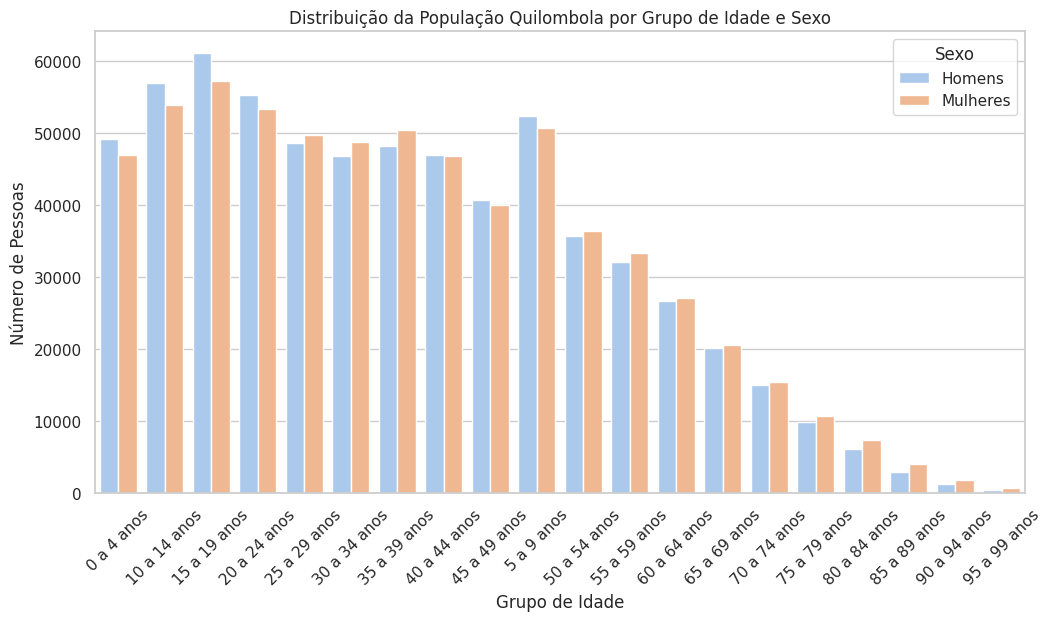

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=distribuicao_idade_sexo, x='grupo_idade', y='pessoas', hue='sexo', palette='pastel')
plt.title('Distribuição da População Quilombola por Grupo de Idade e Sexo')
plt.xlabel('Grupo de Idade')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.show()


**Pergunta 2: Quais são os grupos de idade com maior número de pessoas na população quilombola?**

In [ ]:
distribuicao_idade = df.groupby('grupo_idade')['pessoas'].sum().reset_index()
distribuicao_idade = distribuicao_idade.sort_values(by='pessoas', ascending=False)

<ipython-input-9-ea6c0e2cd10a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=distribuicao_idade, x='grupo_idade', y='pessoas', palette='viridis')


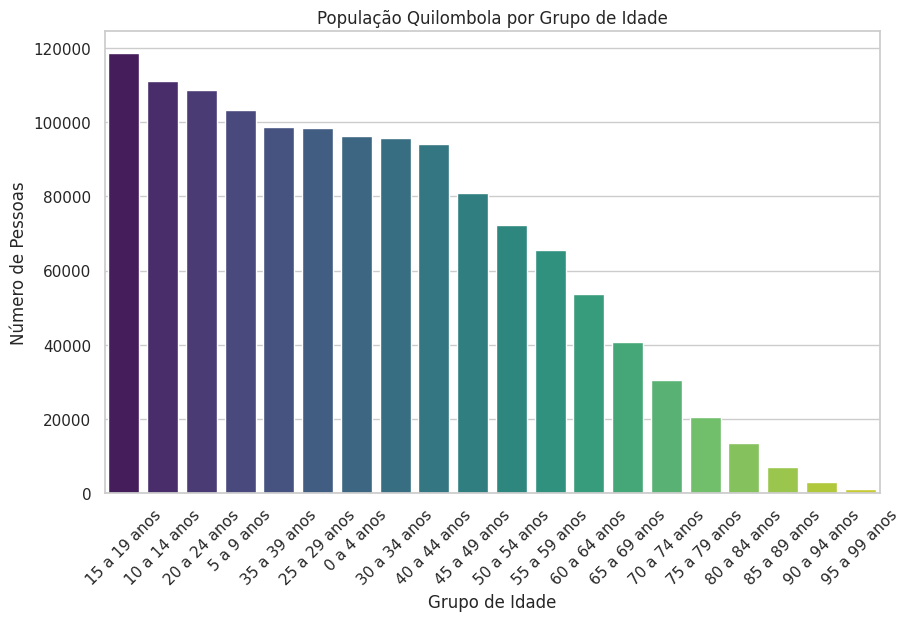

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=distribuicao_idade, x='grupo_idade', y='pessoas', palette='viridis')
plt.title('População Quilombola por Grupo de Idade')
plt.xlabel('Grupo de Idade')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=45)
plt.show()

**Pergunta 3: Como a população quilombola está distribuída entre os municípios?**

In [ ]:
populacao_municipio = df.groupby('id_municipio_nome')['pessoas'].sum().reset_index()
populacao_municipio = populacao_municipio.sort_values(by='pessoas', ascending=False)

<ipython-input-13-f46027ae1eec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=populacao_municipio.head(20), y='id_municipio_nome', x='pessoas', palette='coolwarm')


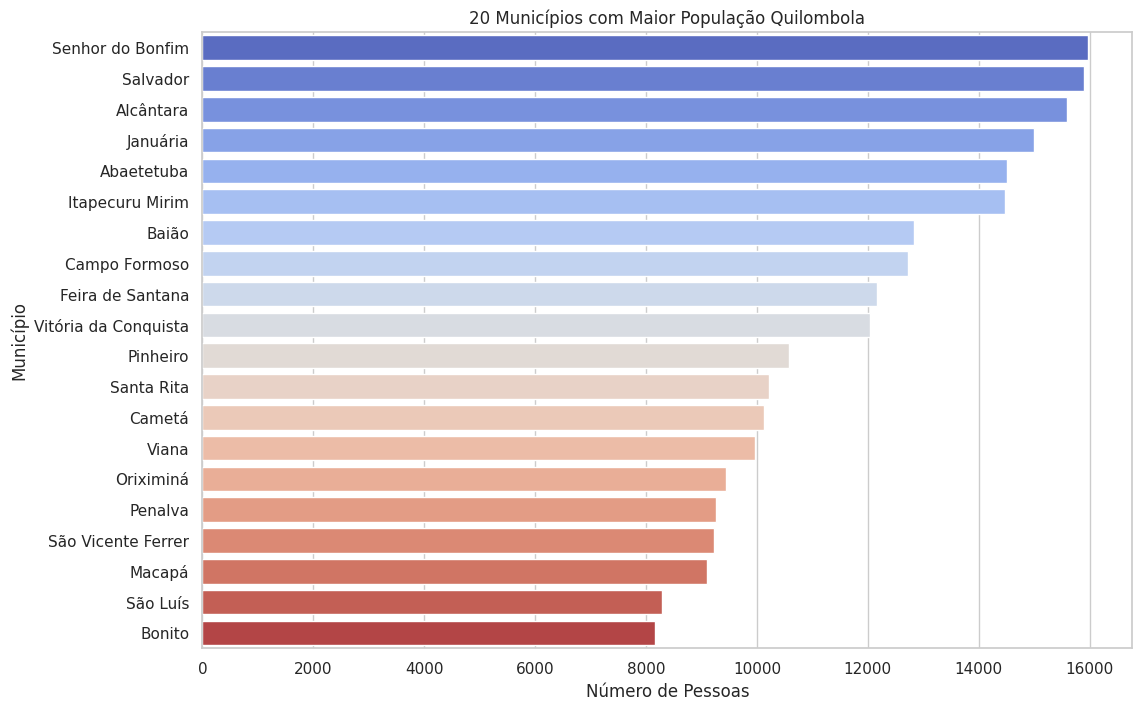

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(data=populacao_municipio.head(20), y='id_municipio_nome', x='pessoas', palette='coolwarm')
plt.title('20 Municípios com Maior População Quilombola')
plt.xlabel('Número de Pessoas')
plt.ylabel('Município')
plt.show()

**Pergunta 4: Existe correlação entre a localização do domicílio e o tamanho da população em diferentes grupos de idade?**

In [ ]:
print(df['localizacao_domicilio'].unique())

['Em territórios quilombolas' 'Fora de territórios quilombolas']


In [ ]:
distribuicao_localizacao_idade = df.groupby(['localizacao_domicilio', 'grupo_idade'])['pessoas'].sum().reset_index()

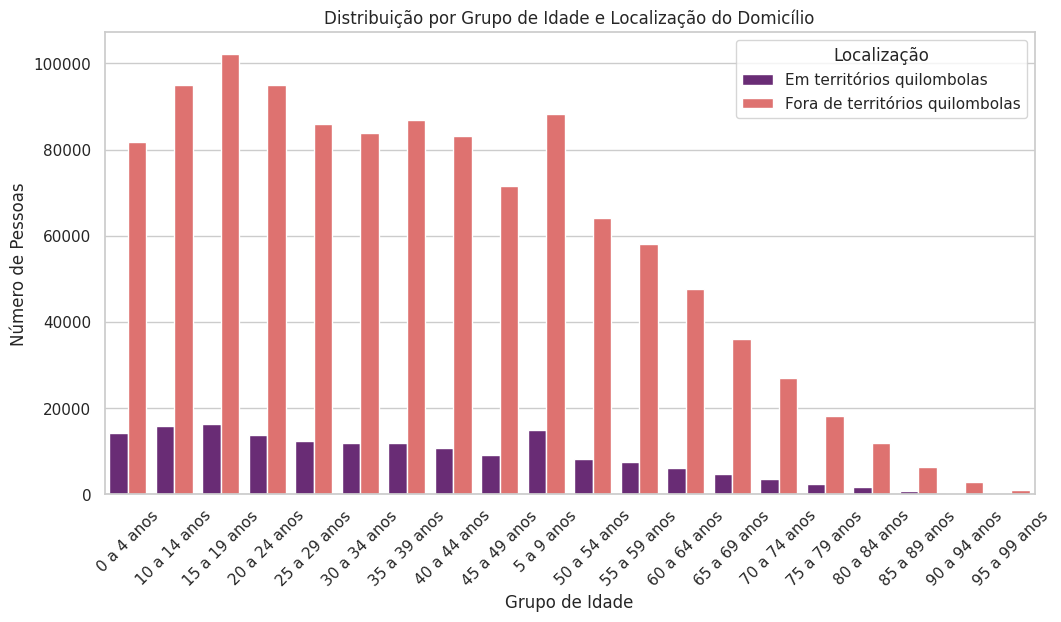

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=distribuicao_localizacao_idade,
    x='grupo_idade',
    y='pessoas',
    hue='localizacao_domicilio',
    palette='magma'
)
plt.title('Distribuição por Grupo de Idade e Localização do Domicílio')
plt.xlabel('Grupo de Idade')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=45)
plt.legend(title='Localização')
plt.show()